In [2]:
##Imports and Loading Data 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
train = pd.read_csv("C:/Users/admin/Desktop/Fake Job Prediction/Data/processed/train.csv")
val = pd.read_csv("C:/Users/admin/Desktop/Fake Job Prediction/Data/processed/val.csv")
test = pd.read_csv("C:/Users/admin/Desktop/Fake Job Prediction/Data/processed/test.csv")

print(train.shape, val.shape, test.shape)


(12600, 25) (1575, 25) (1575, 25)


In [4]:
##Vectorization With TF-IDF 
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words="english")

X_train = tfidf.fit_transform(train["text_clean"])
X_val = tfidf.transform(val["text_clean"])
X_test = tfidf.transform(test["text_clean"])

y_train = train["fraudulent"]
y_val = val["fraudulent"]
y_test = test["fraudulent"]
print(X_train.shape, X_val.shape, X_test.shape)


(12600, 5000) (1575, 5000) (1575, 5000)


In [ ]:
#Training the Model
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
##Evaluation on Val Test 
from sklearn.metrics import classification_report

y_val_pred = model.predict(X_val)
print("Validation Results:\n")
print(classification_report(y_val, y_val_pred, digits=4))


Validation Results:

              precision    recall  f1-score   support

           0     0.9952    0.9721    0.9835      1504
           1     0.6038    0.9014    0.7232        71

    accuracy                         0.9689      1575
   macro avg     0.7995    0.9367    0.8533      1575
weighted avg     0.9776    0.9689    0.9718      1575



In [8]:
##Evaluation on Test Set
y_test_pred = model.predict(X_test)
print("Test Results:\n")
print(classification_report(y_test, y_test_pred, digits=4))


Test Results:

              precision    recall  f1-score   support

           0     0.9925    0.9741    0.9832      1504
           1     0.6061    0.8451    0.7059        71

    accuracy                         0.9683      1575
   macro avg     0.7993    0.9096    0.8446      1575
weighted avg     0.9751    0.9683    0.9707      1575



In [9]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

# Top words pushing toward "fake" (label 1)
top_fake = np.argsort(coefs)[-15:][::-1]
print("Top words indicating FAKE job ads:")
for i in top_fake:
    print(f"{feature_names[i]:<20} → {coefs[i]:.4f}")

# Top words pushing toward "real" (label 0)
top_real = np.argsort(coefs)[:15]
print("\nTop words indicating REAL job ads:")
for i in top_real:
    print(f"{feature_names[i]:<20} → {coefs[i]:.4f}")


Top words indicating FAKE job ads:
nan                  → 7.2280
link                 → 4.9682
earn                 → 3.9003
phone                → 3.5457
aptitude             → 3.4353
subsea               → 3.3193
data entry           → 3.2437
cash                 → 3.1977
high school          → 3.0554
assistant            → 3.0110
email                → 3.0087
engineering          → 2.9997
offshore             → 2.9051
financing            → 2.8350
url                  → 2.7510

Top words indicating REAL job ads:
english              → -3.1713
companies            → -3.0010
digital              → -2.7144
growing              → -2.6451
team                 → -2.5955
clients              → -2.5829
client               → -2.5428
recruitment          → -2.3857
fun                  → -2.3847
marketing            → -2.2126
search               → -2.1791
fast                 → -2.1235
creative             → -2.0602
based                → -2.0073
delivery             → -1.9428


Confusion Matrix (Test Set):
[[1465   39]
 [  11   60]]


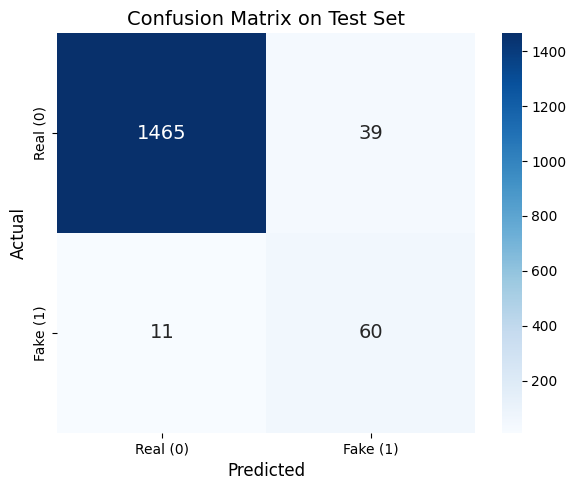

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the matrix in text
print("Confusion Matrix (Test Set):")
print(cm)

# Labels for axes
labels = ["Real (0)", "Fake (1)"]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14})

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix on Test Set", fontsize=14)
plt.tight_layout()
plt.show()


In [15]:
import joblib
import os

os.makedirs("C:/Users/admin/Desktop/Fake Job Prediction/models", exist_ok=True)

joblib.dump(model, "C:/Users/admin/Desktop/Fake Job Prediction/models/model_lr.pkl")
joblib.dump(tfidf, "C:/Users/admin/Desktop/Fake Job Prediction/models/vectorizer_tfidf.pkl")


['C:/Users/admin/Desktop/Fake Job Prediction/models/vectorizer_tfidf.pkl']